In [3]:
import sys
print(sys.version)

3.9.4 (v3.9.4:1f2e3088f3, Apr  4 2021, 12:32:44) 
[Clang 6.0 (clang-600.0.57)]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Summary Statistics

In [2]:
#Loading Dataset to a panda Dataframe
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
#Check Data Shape
df.shape

(2938, 22)

In [4]:
#Description...

In [5]:
#Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
#Description...

In [7]:
#View sample Data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [10]:
# Describe...

# 2. Plot Data

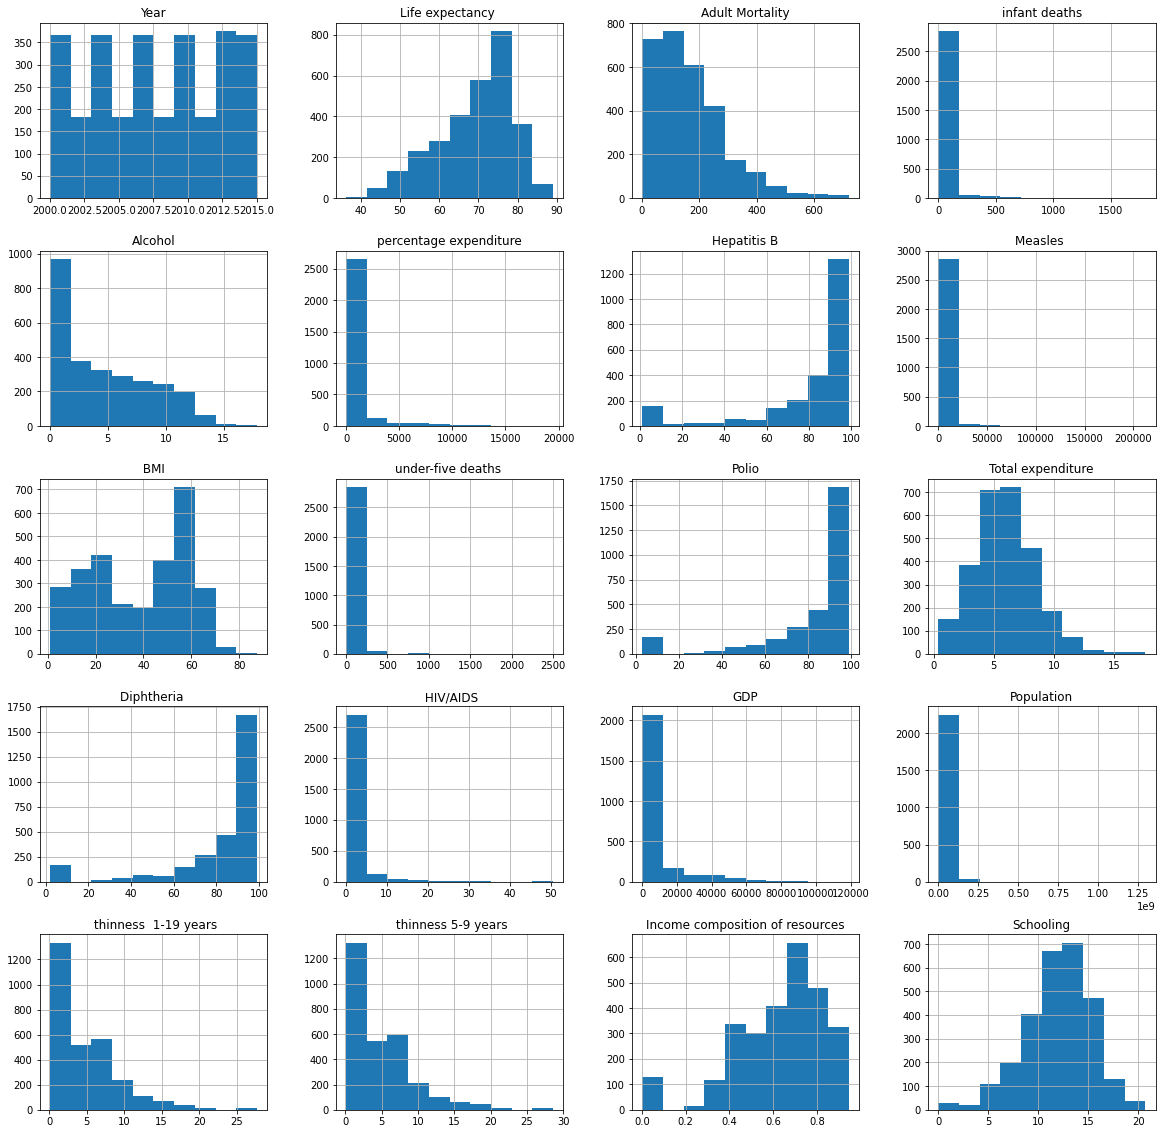

In [11]:
# Histogram to Understand the Data Distribution

hist = df.select_dtypes(include=[np.number]).hist(figsize=[20,20])


<AxesSubplot:xlabel='Population', ylabel='Count'>

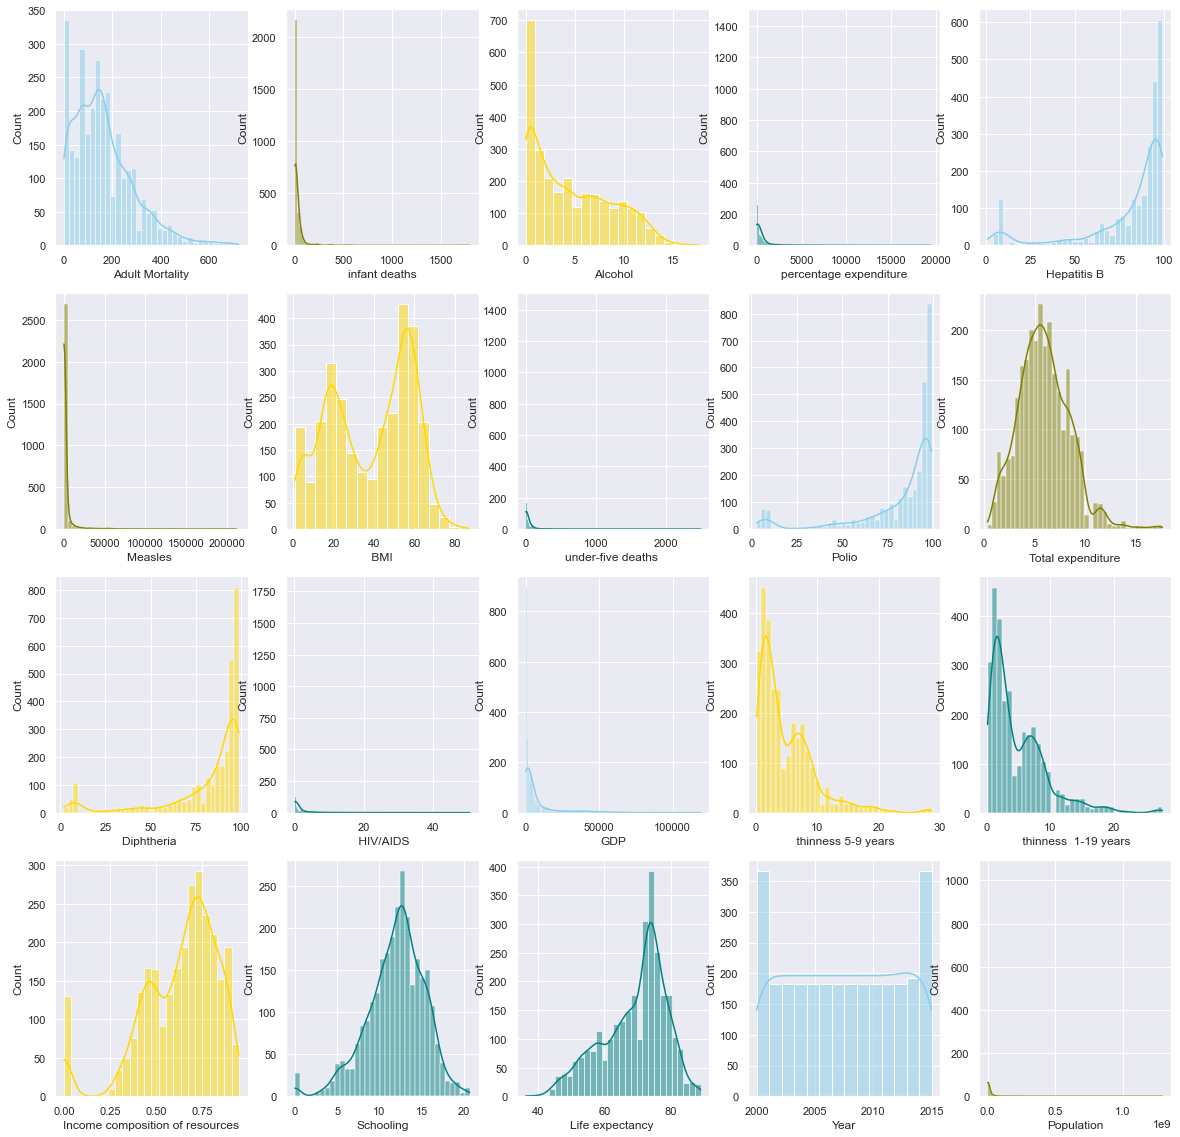

In [12]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 5, figsize=(20, 20))

sns.histplot(data=df, x="Adult Mortality", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="infant deaths", kde=True, color="olive", ax=axs[0, 1],binwidth=20)
sns.histplot(data=df, x="Alcohol", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="percentage expenditure", kde=True, color="teal", ax=axs[0, 3])
sns.histplot(data=df, x="Hepatitis B", kde=True, color="skyblue", ax=axs[0, 4])

sns.histplot(data=df, x="Measles ", kde=True, color="olive", ax=axs[1, 0],binwidth=5000)
sns.histplot(data=df, x=" BMI ", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df, x="under-five deaths ", kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=df, x="Polio", kde=True, color="skyblue", ax=axs[1, 3])
sns.histplot(data=df, x="Total expenditure", kde=True, color="olive", ax=axs[1, 4])

sns.histplot(data=df, x="Diphtheria ", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=df, x=" HIV/AIDS", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df, x="GDP", kde=True, color="skyblue", ax=axs[2, 2])
sns.histplot(data=df, x=" thinness 5-9 years", kde=True, color="gold", ax=axs[2, 3])
sns.histplot(data=df, x=" thinness  1-19 years", kde=True, color="teal", ax=axs[2, 4])

sns.histplot(data=df, x="Income composition of resources", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df, x="Schooling", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=df, x="Life expectancy ", kde=True, color="teal", ax=axs[3, 2])
sns.histplot(data=df, x="Year", kde=True, color="skyblue", ax=axs[3, 3])
sns.histplot(data=df, x="Population", kde=True, color="olive", ax=axs[3, 4])

In [13]:
#Describe...

# 3. Missing Values

In [14]:
#Check for missing values
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [15]:
#Missing values as percentages
round(df.isnull().sum()*100/df.isnull().count())

Country                             0.0
Year                                0.0
Status                              0.0
Life expectancy                     0.0
Adult Mortality                     0.0
infant deaths                       0.0
Alcohol                             7.0
percentage expenditure              0.0
Hepatitis B                        19.0
Measles                             0.0
 BMI                                1.0
under-five deaths                   0.0
Polio                               1.0
Total expenditure                   8.0
Diphtheria                          1.0
 HIV/AIDS                           0.0
GDP                                15.0
Population                         22.0
 thinness  1-19 years               1.0
 thinness 5-9 years                 1.0
Income composition of resources     6.0
Schooling                           6.0
dtype: float64

In [16]:
#Describe...

In [17]:
# Replacing Missing Values with mean
df['Life expectancy '].fillna(value=df['Life expectancy '].mean(), inplace=True)
df['Adult Mortality'].fillna(value=df['Adult Mortality'].mean(), inplace=True)
df['Alcohol'].fillna(value=df['Alcohol'].mean(), inplace=True)
df['Hepatitis B'].fillna(value=df['Hepatitis B'].mean(), inplace=True)
df[' BMI '].fillna(value=df[' BMI '].mean(), inplace=True)
df['Polio'].fillna(value=df['Polio'].mean(), inplace=True)
df['Total expenditure'].fillna(value=df['Total expenditure'].mean(), inplace=True)
df['Diphtheria '].fillna(value=df['Diphtheria '].mean(), inplace=True)
df['GDP'].fillna(value=df['GDP'].mean(), inplace=True)
df['Population'].fillna(value=df['Population'].mean(), inplace=True)
df[' thinness  1-19 years'].fillna(value=df[' thinness  1-19 years'].mean(), inplace=True)
df[' thinness 5-9 years'].fillna(value=df[' thinness 5-9 years'].mean(), inplace=True)
df['Income composition of resources'].fillna(value=df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(value=df['Schooling'].mean(),inplace=True)

In [18]:
#Check for missing values
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# 3. Duplicate Values

As there are no unique fields(Ids, Names, etc), we do not have to consider removing duplicate values. 

# 4. Outliers

## 4.1 Detecting Outliers

In [19]:
# Using Interquartile Range. Criteria : Data lies outside of Q1 and Q3 are considered as Outliers.

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
  
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in df:
    if i.strip() !='Country' and i.strip() != 'Status':
        sample_outliers =[]
        sample_outliers = detect_outliers_iqr(df[i])
        print(f"Number of Outliers for {i}: ", len(sample_outliers))

Number of Outliers for Year:  0
Number of Outliers for Life expectancy :  17
Number of Outliers for Adult Mortality:  86
Number of Outliers for infant deaths:  315
Number of Outliers for Alcohol:  3
Number of Outliers for percentage expenditure:  389
Number of Outliers for Hepatitis B:  316
Number of Outliers for Measles :  542
Number of Outliers for  BMI :  0
Number of Outliers for under-five deaths :  394
Number of Outliers for Polio:  279
Number of Outliers for Total expenditure:  51
Number of Outliers for Diphtheria :  298
Number of Outliers for  HIV/AIDS:  542
Number of Outliers for GDP:  300
Number of Outliers for Population:  194
Number of Outliers for  thinness  1-19 years:  100
Number of Outliers for  thinness 5-9 years:  99
Number of Outliers for Income composition of resources:  130
Number of Outliers for Schooling:  77


## 4.2 Handling Outliers

In [26]:
#Quantile based flooring and capping

In [27]:
# Computing Q1, Q3 percentiles and replacing the outliers
for i in df:
    if i.strip() !='Country' and i.strip() != 'Status':
        q1 = np.percentile(df[i], 25)
        q3 = np.percentile(df[i], 75)
        df[i] = np.where(df[i]<q1, q1, df[i])
        df[i] = np.where(df[i]>q3, q3, df[i])

In [28]:
#Checking for further outliers
for i in df:
    if i.strip() !='Country' and i.strip() != 'Status':
        sample_outliers =[]
        sample_outliers = detect_outliers_iqr(df[i])
        print(f"Number of Outliers for {i}: ", len(sample_outliers))

Number of Outliers for Year:  0
Number of Outliers for Life expectancy :  0
Number of Outliers for Adult Mortality:  0
Number of Outliers for infant deaths:  0
Number of Outliers for Alcohol:  0
Number of Outliers for percentage expenditure:  0
Number of Outliers for Hepatitis B:  0
Number of Outliers for Measles :  0
Number of Outliers for  BMI :  0
Number of Outliers for under-five deaths :  0
Number of Outliers for Polio:  0
Number of Outliers for Total expenditure:  0
Number of Outliers for Diphtheria :  0
Number of Outliers for  HIV/AIDS:  0
Number of Outliers for GDP:  0
Number of Outliers for Population:  0
Number of Outliers for  thinness  1-19 years:  0
Number of Outliers for  thinness 5-9 years:  0
Number of Outliers for Income composition of resources:  0
Number of Outliers for Schooling:  0


# 4. Correlation

<AxesSubplot:>

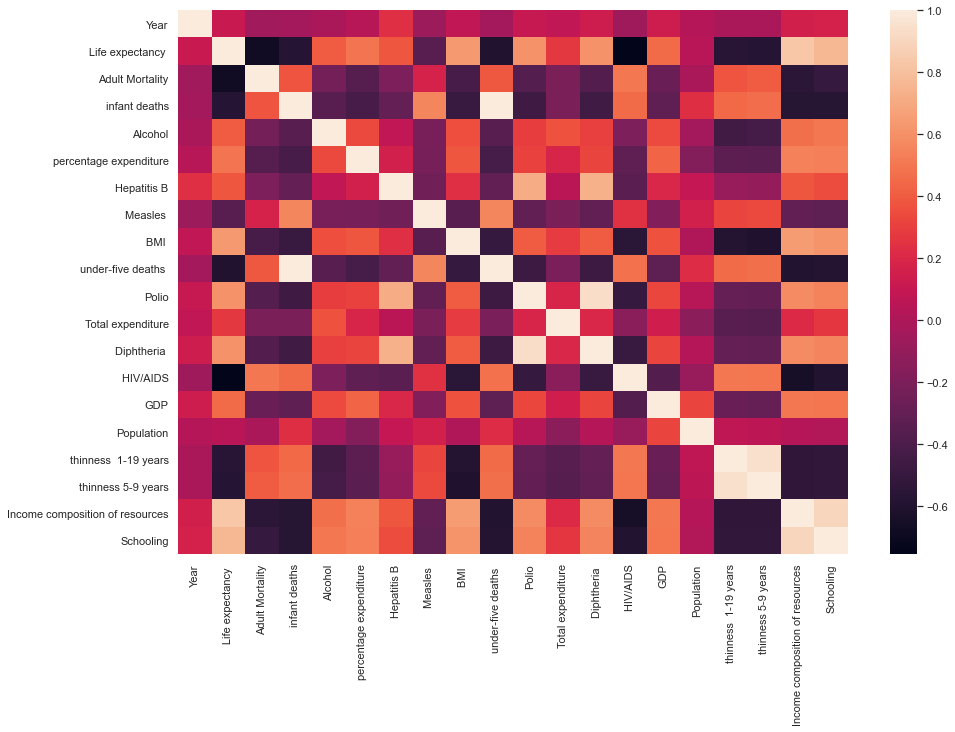

In [29]:
# plot the heatmap
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [30]:
#Describe...(No Correlation in HIV/Under five deaths/etc)

# 5. Normalization

In [31]:
# Assigning Independent and dependent variables
X = df.iloc[:,4:22].values
y = df.iloc[:, [3]].values

In [32]:
# Normalization
minmax = preprocessing.MinMaxScaler()
minmax.fit(X)
X_minmax = minmax.transform(X)
X_minmax

array([[1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.52997221, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.09964272, ..., 0.01785714, 0.        ,
        0.        ],
       [1.        , 1.        , 0.09329099, ..., 1.        , 0.        ,
        0.        ]])

In [33]:
X_minmax.shape

(2938, 18)

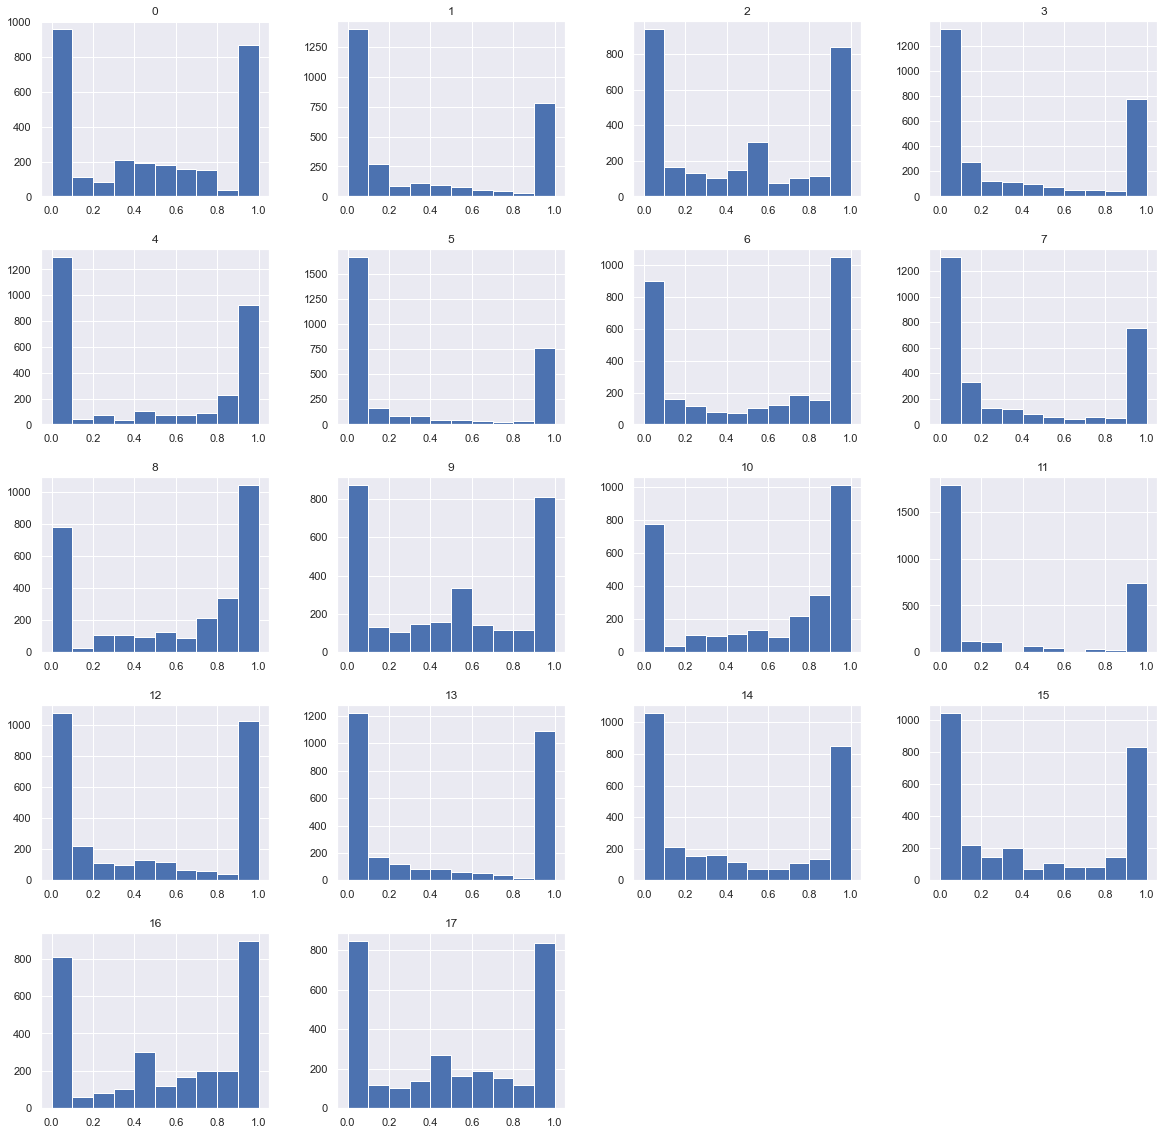

In [34]:
# Histogram to Understand the Data Distribution
dd = pd.DataFrame(X_minmax)
hist = dd.select_dtypes(include=[np.number]).hist(figsize=[20,20])

# 5. ML Model

In [35]:
# Spliting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
# testing the dataset
y_pred = lr.predict(X_test)
"R^2=", metrics.r2_score(y_test, y_pred)    

score2 = metrics.r2_score(y_test, y_pred) 
score2


0.8338567665650103

In [37]:
"RMSE=", np.sqrt(metrics.mean_squared_error(y_test, y_pred))
er2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [47]:
# Spliting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, random_state=0)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
# testing the dataset

y_pred = lr.predict(X_test)

print("Accuracy Score: ",round(metrics.r2_score(y_test, y_pred)*100),"%")   
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Accuracy Score:  83 %
RMSE:  2.112391573431696


In [80]:
score2-score1

7.815970093361102e-14

In [81]:
er2 - er1

-4.960476474025199e-13

# 6. Predict the LIfe expectancy for given inputs

In [82]:
# x_1 = float(input("Adult Mortality: "))
# x_2 = float(input("infant deaths: "))
# x_3 = float(input("Alcohol: "))
# x_4 = float(input("percentage expenditure: "))
# x_5 = float(input("Hepatitis B: "))
# x_6 = float(input("Measles: "))
# x_7 = float(input("BMI: "))
# x_8 = float(input("under-five deaths: "))
# x_9 = float(input("Polio: "))
# x_10 = float(input("Total expenditure: "))
# x_11 = float(input("Diphtheria: "))
# x_12 = float(input("HIV/AIDS: "))
# x_13 = float(input("GDP: "))
# x_14 = float(input("Population: "))
# x_15 = float(input("thinness  1-19 years: "))
# x_16 = float(input("thinness 5-9 years: "))
# x_17 = float(input("Income composition of resources: "))
# x_18 = float(input("Schooling: "))

# X_in = np.array([x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18]).reshape(1, -1)

X_in = np.array([263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3, 0.479, 10.1]).reshape(1, -1)
X_in
    
#Normalizing inputs
minmax.fit(X_in)
X_minmax_in = minmax.transform(X_in)
X_minmax_in
new_predicted_value = lr.predict(X_minmax_in)
'Life expectancy: ', new_predicted_value

('Life expectancy: ', array([[69.13749176]]))